In [55]:
import pandas as pd

data = pd.read_csv("climate_clean.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282576 entries, 0 to 282575
Data columns (total 7 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   country                      282576 non-null  object 
 1   iso3                         282576 non-null  object 
 2   continent                    282576 non-null  object 
 3   year                         282576 non-null  int64  
 4   month                        282576 non-null  object 
 5   average_temperature_celsius  282576 non-null  float64
 6   average_rainfall_mm          282576 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 15.1+ MB


,country,iso3,continent,year,month,average_temperature_celsius,average_rainfall_mm
0,Afghanistan,AFG,Asia,1901,Jan,-0.03780,55.7448
1,Afghanistan,AFG,Asia,1901,Feb,2.42348,13.9480
2,Afghanistan,AFG,Asia,1901,Mar,9.36230,43.8464
3,Afghanistan,AFG,Asia,1901,Apr,13.55640,26.9610
4,Afghanistan,AFG,Asia,1901,May,18.15090,52.9579
...,...,...,...,...,...,...,...
15095,Congo (Republic of the),COG,Africa,1928,Dec,24.52310,141.8630
15096,Congo (Republic of the),COG,Africa,1929,Jan,24.74310,159.2030
15097,Congo (Republic of the),COG,Africa,1929,Feb,25.37590,135.8470
15098,Congo (Republic of the),COG,Africa,1929,Mar,25.65250,173.2400


In [6]:
data.head(10)


,country,iso3,continent,year,month,average_temperature_celsius,average_rainfall_mm
0,Afghanistan,AFG,Asia,1901,Jan,-0.03780,55.74480
1,Afghanistan,AFG,Asia,1901,Feb,2.42348,13.94800
2,Afghanistan,AFG,Asia,1901,Mar,9.36230,43.84640
3,Afghanistan,AFG,Asia,1901,Apr,13.55640,26.96100
4,Afghanistan,AFG,Asia,1901,May,18.15090,52.95790
5,Afghanistan,AFG,Asia,1901,Jun,22.17270,16.64650
6,Afghanistan,AFG,Asia,1901,Jul,25.37870,7.38656
7,Afghanistan,AFG,Asia,1901,Aug,23.66520,0.59306
8,Afghanistan,AFG,Asia,1901,Sep,19.46550,4.82593
9,Afghanistan,AFG,Asia,1901,Oct,11.28370,11.49720


In [12]:
data[data['average_temperature_celsius'] == 0]

,country,iso3,continent,year,month,average_temperature_celsius,average_rainfall_mm
150214,Azerbaijan,AZE,Europe,1964,Dec,-0.0,10.0764
150215,Azerbaijan,AZE,Asia,1964,Dec,-0.0,10.0764


In [33]:
data['country'].nunique()


195

In [22]:
data.dropna(subset=['average_temperature_celsius'], inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282576 entries, 0 to 282575
Data columns (total 7 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   country                      282576 non-null  object 
 1   iso3                         282576 non-null  object 
 2   continent                    282576 non-null  object 
 3   year                         282576 non-null  int64  
 4   month                        282576 non-null  object 
 5   average_temperature_celsius  282576 non-null  float64
 6   average_rainfall_mm          282576 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 15.1+ MB


In [28]:
data_bahrein = data[(data['country'] == "Bahrain") & (data['year'] == 1961)]

In [31]:
data_bahrein.head(12)

,country,iso3,continent,year,month,average_temperature_celsius,average_rainfall_mm
151200,Bahrain,BHR,Asia,1961,Jan,17.2915,12.51010
151201,Bahrain,BHR,Asia,1961,Feb,18.0936,18.20920
151202,Bahrain,BHR,Asia,1961,Mar,21.0623,16.18710
151203,Bahrain,BHR,Asia,1961,Apr,25.5798,21.10090
151204,Bahrain,BHR,Asia,1961,May,31.4525,0.04777
151205,Bahrain,BHR,Asia,1961,Jun,33.6832,0.00292
151206,Bahrain,BHR,Asia,1961,Jul,35.7901,0.00000
151207,Bahrain,BHR,Asia,1961,Aug,35.7554,0.00000
151208,Bahrain,BHR,Asia,1961,Sep,31.9152,0.01169
151209,Bahrain,BHR,Asia,1961,Oct,27.9028,0.00000


In [32]:
data_bahrein["average_temperature_celsius"].mean()

26.693183333333334

In [42]:
data_bahrain = data[data['country'] == "Bahrain"]
unique_year = data_bahrain['year'].unique()
max_year = 0
max_variance = 0


for year in unique_year:
    data_temp = data_bahrain[data_bahrain['year'] == year]
    variance = data_temp['average_temperature_celsius'].var()
    if variance > max_variance:
        max_variance = variance
        max_year = year
print("max variance:", max_variance, "max year:", max_year)

max variance: 67.66455213606062 max year: 1982


In [59]:
data['fah'] = data['average_temperature_celsius'] * 9 / 5 + 32

In [67]:
month_list = ["Jun", "Jul", "Aug"]
data_jja = data[(data['year'] > 1971) & (data['year'] < 1983) & (data['year'] < 1983) & (data['month'].isin(month_list))]
data_jja[(data_jja['continent'] == "Europe") | (data_jja['continent'] == "North America")]['fah'].max().round(2)

83.88

In [68]:
data_europe = data[data['continent'] == "Europe"]
unique_year = data_europe['year'].unique()
max_year = 0
max_mean = 0


for year in unique_year:
    data_temp = data_europe[data_europe['year'] == year]
    mean = data_temp['average_temperature_celsius'].mean()
    if mean > max_mean:
        max_mean = mean
        max_year = year
print("max mean:", max_mean, "max year:", max_year)

max mean: 10.049848605442177 max year: 2014


In [84]:
europe_data = data[data['continent'] == 'Europe']
max_temps_by_year = europe_data.groupby('year')['average_temperature_celsius'].max()
max_temp_year = max_temps_by_year.idxmax()
print(max_temp_year)

The year with the highest maximum average monthly temperature in Europe is year
1901     16574
1902     16598
1903     16622
1904     16646
1905     16670
         ...  
2012    234108
2013    234134
2014    234158
2015    234182
2016    234206
Name: average_temperature_celsius, Length: 116, dtype: int64.


In [69]:
max_row_index = data['average_rainfall_mm'].idxmax()
data.loc[max_row_index]

country                        Northern Mariana Islands
iso3                                                MNP
continent                                       Oceania
year                                               1992
month                                               Aug
average_temperature_celsius                     28.0154
average_rainfall_mm                             2699.19
fah                                            82.42772
Name: 261067, dtype: object

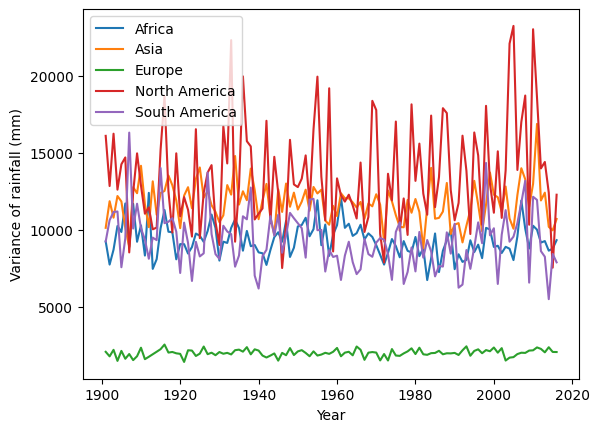

In [71]:
import matplotlib.pyplot as plt
filtered_data = data[data['continent'] != 'Oceania']
grouped_data = filtered_data.groupby(['continent', 'year'])['average_rainfall_mm'].var().reset_index()

continents = grouped_data['continent'].unique()
for continent in continents:
    continent_data = grouped_data[grouped_data['continent'] == continent]
    plt.plot(continent_data['year'], continent_data['average_rainfall_mm'], label=continent)

plt.xlabel('Year')
plt.ylabel('Variance of rainfall (mm)')
plt.legend()
plt.show()

In [81]:
corr_by_country = data.groupby('country')[['average_temperature_celsius', 'average_rainfall_mm']].corr().iloc[::2,-1].reset_index(level=1, drop=True)
most_positively_correlated_country = corr_by_country.idxmax()
print( most_positively_correlated_country)
print(corr_by_country.loc[most_positively_correlated_country], "correlation")

The country with the strongest positive correlation between average monthly temperatures and average monthly rainfall levels is: China
0.9199131962220125 correlation


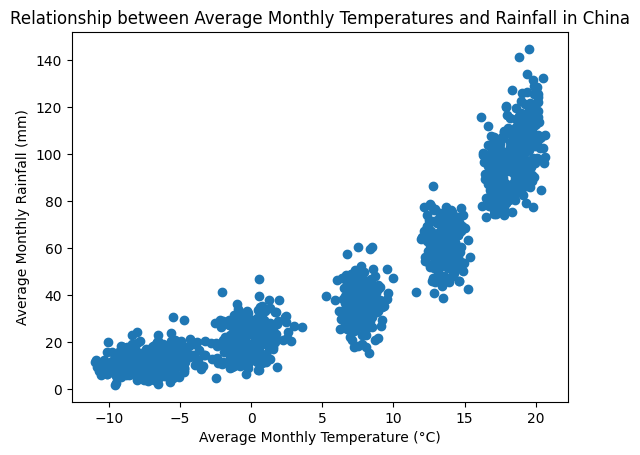

In [82]:
china_data = data.loc[data['country'] == 'China']

plt.scatter(china_data['average_temperature_celsius'], china_data['average_rainfall_mm'])
plt.xlabel('Avg Monthly Temperature (°C)')
plt.ylabel('Avg Monthly Rainfall (mm)')
plt.title('Relationship between Avg Monthly Temperatures and Rainfall in China')
plt.show()